In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path, set_mpl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
%matplotlib inline


# Nway run in distnce-only mode

`cd /Users/sdbykov/work/lockman_hole/data/`


`python nway.py x-ray/lhpv_03_23_sd01_a15_g14.fits :pos_err multi-wave/desi_lh.fits 0.1 --out=cross-match/nway_distance_only.fits --radius 20`



In [3]:
dat = Table.read(data_path+'cross-match/nway_distance_only.fits', format='fits')
matches = dat.to_pandas()
matches.head(5)

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,DESI_desi_id,DESI_ra,DESI_dec,DESI_dered_mag_g,DESI_dered_mag_r,DESI_dered_mag_z,...,DESI_dered_mag_w4,Separation_DESI_EROSITA,Separation_max,ncat,dist_bayesfactor,dist_post,p_single,p_any,p_i,match_flag
0,b'SRGe J103744.3+571156',159.434594,57.198788,2.041112,b'-99',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,NaN,0.000000,1,0.000000,1.000000e+00,1.000000e+00,0.89496,0.000000e+00,0
1,b'SRGe J103744.3+571156',159.434594,57.198788,2.041112,b'609162.0_1232.0',159.440651,57.200364,23.716750,22.213188,20.890049,...,NaN,13.104032,13.104032,2,1.380383,1.004159e-08,1.004159e-08,0.89496,1.178560e-09,0
2,b'SRGe J103744.3+571156',159.434594,57.198788,2.041112,b'609162.0_1202.0',159.437211,57.203456,22.256983,22.344162,21.551195,...,NaN,17.561602,17.561602,2,-5.727325,7.835991e-16,7.835991e-16,0.89496,9.196933e-17,0
3,b'SRGe J103744.3+571156',159.434594,57.198788,2.041112,b'609162.0_1191.0',159.435390,57.201792,23.987741,24.068224,NaN,...,NaN,10.924277,10.924277,2,4.103775,5.311193e-06,5.311193e-06,0.89496,6.233666e-07,0
4,b'SRGe J103744.3+571156',159.434594,57.198788,2.041112,b'609162.0_1210.0',159.437965,57.200696,23.338484,23.416210,23.045345,...,15.477362,9.507520,9.507520,2,5.608932,1.699327e-04,1.699327e-04,0.89496,1.994803e-05,0


## very secure matches

that are the only possible counterparts (match_flag = 1), other sources have match_flag = 0

In [4]:
def secure_match(flags):
    return np.sum(flags) == 1

matches['is_secure']  = matches.groupby('EROSITA_ID').match_flag.transform(secure_match)
secure_ctps = matches[(matches.match_flag == 1) & (matches.is_secure == 1) & (matches.Separation_DESI_EROSITA.notnull())]
secure_ctps

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,DESI_desi_id,DESI_ra,DESI_dec,DESI_dered_mag_g,DESI_dered_mag_r,DESI_dered_mag_z,...,Separation_DESI_EROSITA,Separation_max,ncat,dist_bayesfactor,dist_post,p_single,p_any,p_i,match_flag,is_secure
6,b'SRGe J103744.3+571156',159.434594,57.198788,2.041112,b'609162.0_1184.0',159.434616,57.198786,16.058165,16.111576,15.616705,...,0.042512,0.042512,2,10.309011,0.894956,0.894956,0.894960,0.999954,1,True
52,b'SRGe J103024.9+551625',157.603624,55.273624,2.621801,b'602726.0_2784.0',157.603987,55.272935,16.997105,16.802668,16.301191,...,2.590241,2.590241,2,9.880406,0.760513,0.760513,0.773927,0.927630,1,True
69,b'SRGe J110607.9+582608',166.532952,58.435685,2.472613,b'613025.0_2751.0',166.533536,58.435887,18.324488,17.935024,17.616096,...,1.319125,1.319125,2,10.081156,0.834483,0.834483,0.908614,0.507078,1,True
83,b'SRGe J105625.3+601554',164.105229,60.265022,3.923048,b'618183.0_1332.0',164.103477,60.265869,17.704462,17.601166,17.351686,...,4.366625,4.366625,2,9.473496,0.554422,0.554422,0.568354,0.944985,1,True
128,b'SRGe J105055.2+552722',162.729852,55.456242,2.160889,b'603560.0_3468.0',162.729756,55.456473,17.324781,17.241852,16.698002,...,0.856287,0.856287,2,10.225661,0.875498,0.875498,0.895882,0.817253,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78383,b'SRGe J102320.5+561701',155.835523,56.283495,8.145123,b'605980.0_198.0',155.841547,56.280486,24.236143,23.725950,22.841162,...,16.193022,16.193022,2,8.249897,0.069210,0.069210,0.069210,1.000000,1,True
78387,b'SRGe J104421.8+545706',161.091018,54.951776,7.262971,b'601907.0_1599.0',161.088426,54.951388,23.767912,23.128922,22.213058,...,5.538041,5.538041,2,9.081342,0.335276,0.335276,0.483251,0.539347,1,True
78622,b'SRGe J102134.9+562600',155.395372,56.433367,8.331568,b'606780.0_1583.0',155.393751,56.432404,19.892618,19.460478,19.330465,...,4.735408,4.735408,2,9.018227,0.303699,0.303699,0.465587,0.500635,1,True
78628,b'SRGe J104413.3+543732',161.055471,54.625607,8.885631,b'601075.0_461.0',161.054382,54.625974,23.303967,22.702583,21.625786,...,2.627975,2.627975,2,9.013457,0.301381,0.301381,0.431631,0.568059,1,True


In [5]:
secure_ctps.sort_values(by='p_any')

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,DESI_desi_id,DESI_ra,DESI_dec,DESI_dered_mag_g,DESI_dered_mag_r,DESI_dered_mag_z,...,Separation_DESI_EROSITA,Separation_max,ncat,dist_bayesfactor,dist_post,p_single,p_any,p_i,match_flag,is_secure
19584,b'SRGe J105424.1+581312',163.600547,58.219893,4.509650,b'612260.0_892.0',163.598662,58.224154,22.954832,22.269753,22.044962,...,15.748556,15.748556,2,6.974486,0.003928,0.003928,0.007606,0.514586,1,True
32165,b'SRGe J104055.7+582057',160.232224,58.349130,6.946463,b'612253.0_542.0',160.226182,58.344609,22.604572,22.447096,21.942133,...,19.880943,19.880943,2,7.467939,0.012135,0.012135,0.012135,1.000000,1,True
45535,b'SRGe J104032.0+581430',160.133217,58.241558,6.625135,b'612252.0_3181.0',160.140806,58.244660,23.714483,22.742628,21.745838,...,18.205406,18.205406,2,7.648061,0.018259,0.018259,0.018259,1.000000,1,True
33112,b'SRGe J104529.6+570909',161.373177,57.152402,6.246927,b'609166.0_1890.0',161.367223,57.155648,23.165283,22.993301,22.521322,...,16.481838,16.481838,2,7.827238,0.027329,0.027329,0.027329,1.000000,1,True
36626,b'SRGe J103406.9+583405',158.528680,58.568065,6.053107,b'613008.0_3710.0',158.533394,58.564187,24.224766,24.083073,22.966516,...,16.530842,16.530842,2,7.746722,0.022810,0.022810,0.033799,0.667280,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,b'SRGe J104705.3+544405',161.771945,54.734641,2.179084,b'601076.0_3201.0',161.771520,54.734967,19.174524,18.506480,18.293478,...,1.470978,1.470978,2,10.153676,0.856279,0.856279,0.908728,0.598407,1,True
4192,b'SRGe J104601.9+544518',161.507963,54.755121,2.421956,b'601076.0_692.0',161.507685,54.755191,20.270363,20.002540,20.005161,...,0.630934,0.630934,2,10.146097,0.854118,0.854118,0.909655,0.581494,1,True
482,b'SRGe J104537.4+594656',161.405860,59.782184,2.166287,b'616729.0_1177.0',161.405985,59.782095,15.107376,13.736624,13.362981,...,0.391643,0.391643,2,10.250442,0.881586,0.881586,0.917738,0.667332,1,True
467,b'SRGe J104058.8+581704',160.245041,58.284325,2.210050,b'612253.0_701.0',160.245019,58.284276,17.215023,16.652575,16.401758,...,0.182168,0.182168,2,10.238715,0.878738,0.878738,0.920123,0.629089,1,True


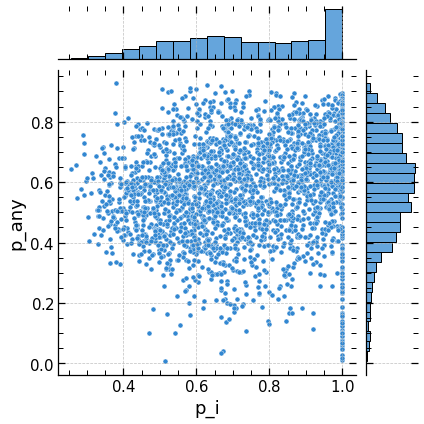

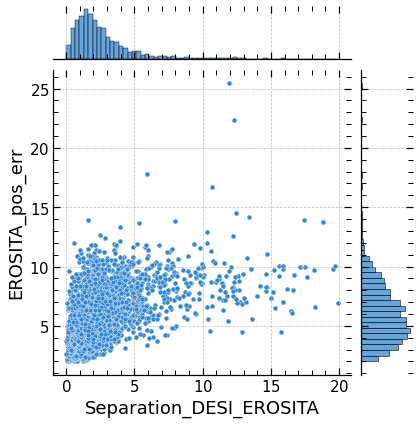

In [6]:
sns.jointplot(data = secure_ctps, x = 'p_i', y =  'p_any')
sns.jointplot(data = secure_ctps, x = 'Separation_DESI_EROSITA', y = 'EROSITA_pos_err')

<AxesSubplot:xlabel='EROSITA_RA', ylabel='EROSITA_DEC'>

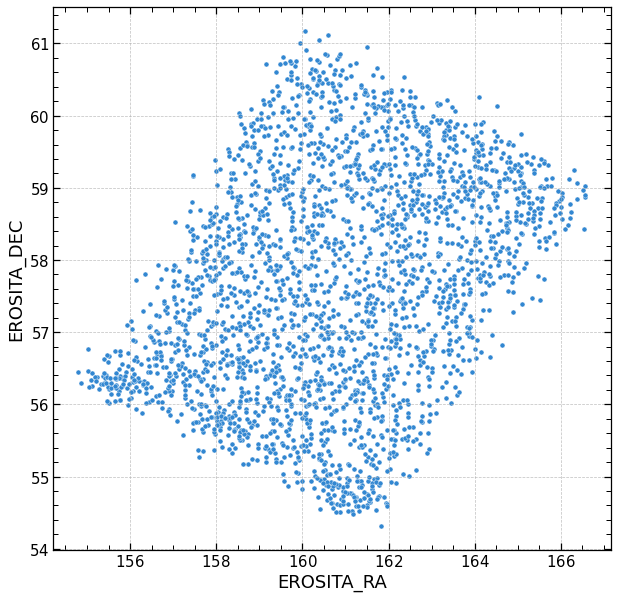

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = secure_ctps, x = 'EROSITA_RA', y = 'EROSITA_DEC')

In [11]:
def count_quality(flags):
    return np.unique(flags, return_counts=True)

all_matches = matches.groupby('EROSITA_ID').match_flag.apply(count_quality)
all_matches

EROSITA_ID
b'SRGe J101903.3+563020'    ([0, 1, 2], [5, 1, 4])
b'SRGe J101903.4+563325'    ([0, 1, 2], [1, 1, 3])
b'SRGe J101911.0+562639'          ([0, 1], [2, 1])
b'SRGe J101914.3+563109'    ([0, 1, 2], [1, 1, 3])
b'SRGe J101919.2+562429'    ([0, 1, 2], [6, 1, 1])
                                     ...          
b'SRGe J110749.6+583509'    ([0, 1, 2], [1, 1, 5])
b'SRGe J110750.9+590607'    ([0, 1, 2], [5, 1, 3])
b'SRGe J110757.2+590708'    ([0, 1, 2], [2, 1, 2])
b'SRGe J110815.1+583836'    ([0, 1, 2], [4, 1, 4])
b'SRGe J110820.3+584414'    ([0, 1, 2], [6, 1, 1])
Name: match_flag, Length: 9497, dtype: object

In [12]:
all_matches.value_counts()